In [16]:
#imports

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models

In [17]:
# Define the model
model = models.Sequential()

model.add(layers.Conv2D(1, (3, 3), padding='valid', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(1, (3, 3), padding='valid'))

model.add(layers.Flatten())
model.add(layers.Dense(3, activation='sigmoid'))  
model.add(layers.Dense(1, activation='sigmoid'))  

model.compile(
    optimizer='adam',               
    loss='binary_crossentropy',    
    metrics=['accuracy']           
)

model.summary()

c:\Users\nandi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 1)      │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 1)        │            10 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
'''
8 weights
9 bias 0
'''
x=model.get_weights()[8]
print((x))

[[-0.42910326]
 [ 0.9825095 ]
 [ 1.2147812 ]]


In [19]:
def save_model_parameters(layer_num, layer):
    save_dir = "InitWeightsSeries"
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    file_path = os.path.join(save_dir, f"layer_number_{layer_num}.npz")
    
    weights = layer.get_weights()  
    if weights:  
        np.savez(file_path, *weights)
        print(f"Saved parameters for layer {layer_num} to {file_path}")
    else:
        print(f"Layer {layer_num} has no weights to save.")

In [20]:
for i, layer in enumerate(model.layers):
    save_model_parameters(i, layer)

Saved parameters for layer 0 to InitWeightsSeries\layer_number_0.npz
Layer 1 has no weights to save.
Saved parameters for layer 2 to InitWeightsSeries\layer_number_2.npz
Layer 3 has no weights to save.
Saved parameters for layer 4 to InitWeightsSeries\layer_number_4.npz
Layer 5 has no weights to save.
Saved parameters for layer 6 to InitWeightsSeries\layer_number_6.npz
Saved parameters for layer 7 to InitWeightsSeries\layer_number_7.npz


In [21]:
for i, layer in enumerate(model.layers):
    weights = layer.get_weights()
    if weights:
        print(f"Layer {i} ")
    else:
        print(f"Layer {i} has no weights.")

Layer 0 
Layer 1 has no weights.
Layer 2 
Layer 3 has no weights.
Layer 4 
Layer 5 has no weights.
Layer 6 
Layer 7 


First Conv2D Layer Kernels:


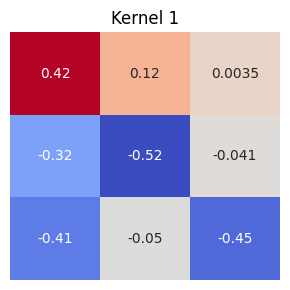

Second Conv2D Layer Kernels:


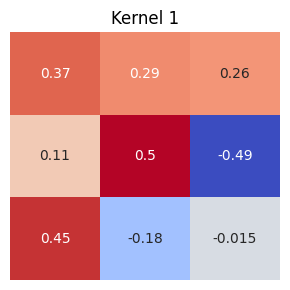

Third Conv2D Layer Kernels:


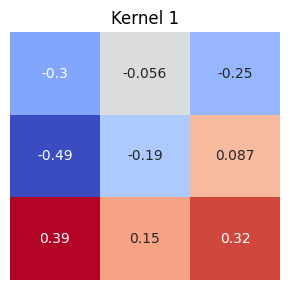

In [22]:
def plot_kernels(layer, num_kernels):
    kernels = layer.get_weights()[0]  # Get the kernel weights
    min_val = np.min(kernels)
    max_val = np.max(kernels)
    fig, axes = plt.subplots(1, num_kernels, figsize=(num_kernels * 3, 3))
    if num_kernels == 1:
        axes = [axes]      
    for i in range(num_kernels):
        kernel = kernels[:, :, 0, i]  # 3x3 for each kernel
        sns.heatmap(kernel, vmin=min_val, vmax=max_val, annot=True, cmap="coolwarm", cbar=False, ax=axes[i])
        axes[i].set_title(f'Kernel {i+1}')
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

print("First Conv2D Layer Kernels:")
plot_kernels(model.layers[0], 1)
print("Second Conv2D Layer Kernels:")
plot_kernels(model.layers[2], 1)
print("Third Conv2D Layer Kernels:")
plot_kernels(model.layers[4], 1)
